# **Lab 2**
### Weightage 3%
## Linear Regression
---
Dataset used: 
  ACS Flammability Limit Computation

---



Maximum Points in the Lab: 65

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **Feb 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [12]:
# Import necessary libraries

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize

Describe the arguments and output of the linear regression function call in sklearn package.



---
**5 Points** 


---




We will be using the ACS flammability limit computation dataset for linear regression task. The dataset contains 105 molecular properties of few chemical compounds from which Flammability Limit is to be computed. The following block contains code to read the excel file from the given URL and preprocess the data. **Please don't make any changes to the block below.**

In [2]:

# Load the dataset onto a data frame. !! Please dont make any changes !!
url = "https://ndownloader.figshare.com/files/18729491"
data_frame = pd.read_excel(url,encoding='latin-1',skiprows=5)

# Necessary attributes converted to numpy arrays
target = data_frame.iloc[:,4].to_numpy()
input_features = data_frame.iloc[:,6:].to_numpy()


We have input attributes and output vector ready. Now the first step is to split the entire dataset into training and test subsets. sklearn package provides you a flexible way of doing this. All you need to do is just specify input attributes array, target array and fraction of the test set. Once the split is done, we are ready to train the model and evaluate it. 

- We would like you to experiment with different test set fractions and comment on how well the model is able to estimate the target value for new test instances? 

- Also there is another flexibility to tune the intercept term on or off. We would like you to experiment on those possibilities as well.

**Note:** Don't forget to explicitly normalize the attributes.

---


**10 Points** 

---



In [36]:

test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list = []

normalized_features = normalize(input_features)

# Step 1: Create a linear regressor object 
linRegressor = LinearRegression()


# Step 2: Create a linear regressor object forcing bias or intercept as 0
zeroBiasRegressor = LinearRegression(fit_intercept = False)

# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    
    # Step 3: Split into train and test set based on the fraction
    X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=fraction, random_state=107)
    

    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    print("With intercept!")
    linRegressor.fit(X_train, y_train)
    

    # Step 4(b): Predict the target values using the trained model for test set instances
    yPred = linRegressor.predict(X_test)
    

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    mse = metrics.mean_squared_error(y_test, yPred)
    print(f"The mse for non-zero intercept with test-fraction {fraction} is: {mse}")  
    mse_list.append(mse)
    
    # Checking the outliers
    outliersCount = 0
    for i in range(len(yPred)):
        if abs(yPred[i]) > 100:
            outliersCount+=1
            yPred[i] = y_test[i]
    mseWithoutOutliers = metrics.mean_squared_error(y_test, yPred)
    print(f"The number of outliers are {outliersCount} and mse without outliers is {mseWithoutOutliers}")
    print(f"The intercept term here is {linRegressor.intercept_}")
    print("-------------------------------------------")
    
    

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    print("Without intercept!")
    zeroBiasRegressor.fit(X_train, y_train)
   

    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    yPred = zeroBiasRegressor.predict(X_test)
   

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    mse = metrics.mean_squared_error(y_test, yPred)
    print(f"The mse for zero intercept with test-fraction {fraction} is: {mse}")
    mse_list.append(mse)
    
    print("-------------------------------------------", "\n")


With intercept!
The mse for non-zero intercept with test-fraction 0.2 is: 4.868946066059448e+19
The number of outliers are 4 and mse without outliers is 0.05874673849599312
The intercept term here is 1.4567432840365278
-------------------------------------------
Without intercept!
The mse for zero intercept with test-fraction 0.2 is: 0.1121553834241755
------------------------------------------- 

With intercept!
The mse for non-zero intercept with test-fraction 0.3 is: 3.121353193401153e+17
The number of outliers are 7 and mse without outliers is 0.05680688784367587
The intercept term here is 1.5045313136729943
-------------------------------------------
Without intercept!
The mse for zero intercept with test-fraction 0.3 is: 0.11747826990212407
------------------------------------------- 

With intercept!
The mse for non-zero intercept with test-fraction 0.4 is: 2.1662306669373463e+21
The number of outliers are 12 and mse without outliers is 0.049181513930046265
The intercept term he

In the previous block you have experimented with different settings of the Linear Regression model. You have test set mean squared error stored. Figure out which setting gave the least mean squared error. 

---

**5 Points**

---




In [43]:
# Insert your code to identify the best fraction and intercept requirement. Also, print the best setting chosen.
minIndex = mse_list.index(min(mse_list))

finalFraction = test_size_fractions[int(minIndex/2)]

finalFitIntercept = False
if minIndex%2 == 1:
    finalFitIntercept = False
else:
    finalFitIntercept = True
    
print(f"Final test-fraction size is {finalFraction} and value of fit_intersept is {finalFitIntercept}!")

Final test-fraction size is 0.2 and value of fit_intersept is False!


Now that you have figured out the best model setting, use that setting to train the model to predict test instances.


---

**3 Points**


---



In [52]:
# Step 1: Split the entire dataset into train and test set based on the best fraction
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, 
                                                    test_size=finalFraction, random_state=21)


# Step 2: Create a linear regressor object with intercept turned on or off as per best model setting
regressor = LinearRegression(fit_intercept = finalFitIntercept)


# Step 3(a): Train the Linear Regression model using training set
regressor.fit(X_train, y_train)


# Step 3(b): Predict the target values using the trained model for test set instances
yPred = regressor.predict(X_test)


# Step 3(c): Print the mean squared error of the model on test set. 
mse = metrics.mean_squared_error(y_test, yPred)
print(f"The mse for model is: {mse}")


The mse for model is: 0.09237050175009562


Now check the goodness of the model with repsect to prediction on test instances. The aim is to predict the target values for test instances using the trained model. These values would be plotted against the true values of the test instances. A good model would yield a plot that looks *close to a line of slope 45 degree*. **Comment** on the goodness of the learned model using this test.

---

**5 points** 

---







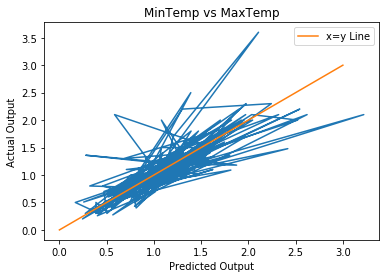

In [55]:
# Insert your code to plot true vs predicted test values
plt.plot(yPred, y_test)
plt.plot([0,3], [0,3], label='x=y Line')
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('Predicted Output')  
plt.ylabel('Actual Output')  
plt.legend()
plt.show()


You have implemented simple linear regression. You may apply regularization techniques that constrain the coefficients. We will be seeing 2 types of regularized regression techniques:


1.   Ridge Regression
2.   Lasso Regression



# Ridge Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
**5 Points** 


---







In ridge regression, L-2 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and comment on the model performance. You may use the best setting of Linear Regression to Ridge Regression also. **Comment** on the effect of the alpha value on the mean squared error.


---

**9 Points**


---



In [0]:

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below


for alpha_ in alpha_values:


    # Step 2: Create a Ridge regressor object with desired alpha value
    # Insert your code below
    

    # Step 3(a): Train the Ridge Regression model using training set
    # Insert your code below
    

    # Step 3(b): Predict the target values using the trained Ridge model for test set instances
    # Insert your code below
    

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    


# Step 4: Plot a graph of different alpha values of ridge regression versus mean squared error




# Lasso Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
**5 Points** 


---




In Lasso regression, L-1 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and **comment** on the model performance. You may use the best setting of Linear Regression to Lasso Regression also.

---

**9 Points**

---



In [0]:
from sklearn import linear_model

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below


for alpha_ in alpha_values:

    # Step 2: Create a LASSO regressor object with desired alpha value
    # Insert your code below
   

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below
    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error




Now since you have tried LASSO with different alpha values, you may try different number of maximum iterations associated with LASSO and **comment** on its effect on the mean squared error.


---

**9 Points**

---



In [0]:

# Step 1: Split into train and test set based on the best fraction
# Insert your code below


for m_iterations in range(1,200,2):

    

    # Step 2: Create a LASSO regressor object with desired number of iterations
    # Insert your code below
    

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below
    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
   

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error


